NAME = ""
COLLABORATORS = ""

---

# CS110 Assignment 3 - Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

For details on how to create a nice PDF from a Jupyter notebook, refer again to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1).

### HCs and LOs for this assignment
[#responsibility], [#PythonProgramming], [#CodeReadability], [#DataStructures], [#ComplexityAnalysis], [#ComputationalCritique]

## Question 0

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 10 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

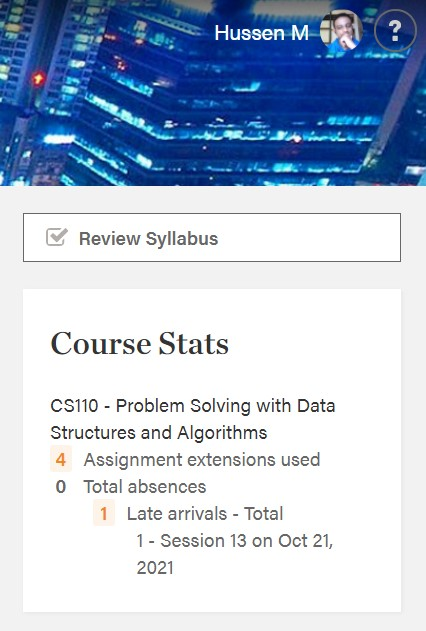

In [229]:
# YOUR Q0 ANSWER HERE
from IPython.display import Image
Image("name and makeup work.jpg") 

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

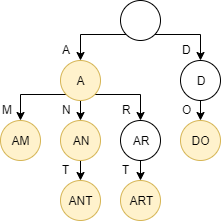

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.

I used the method using both a Node and a Trie class to implement the data structure. There could be multiple reasons why people might prefer this method. For me, I think of a class as a blueprint for an object. That means it contains the attributes that an instance of that class possesses and methods that can be executed on an instance of the class. By differentiating the two things as separate, I can give them separate attributes and methods that can work with each other to achieve what we want (the trie data structure) but separate them and only group attributes and methods that make logical sense together. I’ll give a simple example to explain what I mean by logical: one of the methods I implement in this assignment is a function that takes in a node as an input and returns a string that node represents if that node is an end of a word. This method could technically be implemented in the Trie class, but it makes more logical sense to implement it in the Node class because we are directly working with the node, and the method is one that is executed on an instance of the Node class. Thus it makes more semantic and logical sense to put it there. There are multiple examples of this, but the point is that, for me, I like to group my code in a way that makes sense in how it's organized because that will allow for ease of readability and ease of debugging and makes the code harder to break.

### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [230]:
# VERSION 1 - Node + Trie classes


class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        """Creates the Node instance
        
        Parameters
        ----------
        char : char
            A character to be inserted into the node
        is_end : boolean
            A boolean to tell us whether or not the node represents an end of word
        children : dictionary
            A dictionary whose keys and values are in the form of char: nodes that represent the character and node children of a node
        parent : Node
            A Node instance that represents the parent of the parent of the given node
        """
        # YOUR CODE HERE
        self.char = char
        self.is_end = False
        self.children = {}
        self.parent = None
        
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        self.root = Node('')
        
        # For each word, call the insert method on it
        if word_list is not None:
            for word in word_list:
                self.insert(word)
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        currentNode = self.root # Initialize our current node to traverse from the root
        
        for char in word.lower():
            if char not in currentNode.children:
                node = Node(char)  # Create a node
                currentNode.children[char] = node  # Set the node as a choldren of the current node
                node.parent = currentNode  # Set the current node as the parent of the node we just created

            currentNode.children = collections.OrderedDict(sorted(currentNode.children.items()))  # Sort the dictionary that hold the children of the node alphabetically instead of it being the order they were inserted in
            
            currentNode = currentNode.children[char]  # Update the current node for the next iteration
        
        currentNode.is_end = True  # After all the characters of a word are fully inserted, set the 'is_end' attribute of the last node to True because it represents the end of a word
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        currentNode = self.root  # Initialize our current node to traverse from the root
        for char in word.lower():
            # If a character of the word is not found, return False 
            if char not in currentNode.children:
                return False
            currentNode = currentNode.children[char]  # Continue traversing the trie
            
        return currentNode.is_end
        

# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(wordbank)
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie.lookup('an') == True
# this is a prefix, but NOT a word
assert trie.lookup('ele') == False
# not in the wordbank
assert trie.lookup('Mithrandir') == False

# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

In [248]:
# YOUR NEW TESTS HERE
assert trie.lookup('Lantar') == False  # Capital letter
assert trie.lookup('') == False  # Empty string
assert trie.lookup('Ai!') == False  # Exclamation included

In the first test, I used a capital letter to see if my code can handle this case. The word 'lantar' exists in the word bank, but the word 'Lantar', with a capital 'L' doesn't exist, and so it gives us False, as we expected. In the second test, I searched for an empty string. An empty string is not part of the word bank and thus doesn't exist in our tree, so it should give us False, and as expected, it does return False. In the third one, I searched for 'Ai!'. the exclamation is taken out when we insert it into the trie, so it should give us False and it does.

## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

The computational complexity of insertion and searching in a trie depends on the length of the string to be inserted or searched. Let's say we have a trie and we want to search for a word. In the worst case scenario, the word exists in the trie and we would have to traverse down the trie to a depth equal to the length of the word. In some cases, the end of word would be a leaf and thus we would have to traverse to the end of, but in other cases, the end of the word could be in the middle of the trie. But either way, we would have to traverse the tree k number of times, where k is the length of the word. Therefore, the time complexity for searching in a trie takes O(k) time where k is the length of the word to be searched. The same goes for insertion. If the length of the word to be inserted is k, it takes O(k) time for inserting the word into the tree in the average case. For the best case and worst case, the asymptotic complexity is the same, but they have different constants. For the worst case, if we are talking about the English language, the time would be O(26k) but asymptotically, that is still O(k). Therefore, for both inserting and searching, the time complexity is O(k) where k is the length of the string.

In a BST, our time complexities for inserting and searching is O(logn). That is because every node can have maximum children of two, so the next level in the tree can be twice as big as the current one, but for tries, they can have more than two children. Therefore, in certain instances, the runtime operations in tries might be higher than for BSTs because we have to use each letter in a word to insert it and also search it. 

A dictionary can be used to insert words and look them up later, but one advantage we get in tries that we don't get in dictionaries (hash tables) is that we can do searches using prefixes which is not the case in hash tables. The space required for tries is as a result higher but if the operation is necessary for us, like in autocompletion, for example, then we can benefit a lot from using tries.

## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

In [235]:
# depending on your choice of approach, 
# add this method to your Node or Trie class
import collections

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        """Creates the Node instance
        
        Parameters
        ----------
        char : char
            A character to be inserted into the node
        is_end : boolean
            A boolean to tell us whether or not the node represents an end of word
        children : dictionary
            A dictionary whose keys and values are in the form of char: nodes that represent the character and node children of a node
        parent : Node
            A Node instance that represents the parent of the parent of the given node
        """
        # YOUR CODE HERE
        self.char = char
        self.is_end = False
        self.children = {}
        self.parent = None
        
    def to_string(self):
        '''
        Creates the string a given node represents
        
        Returns
        ----------
        string
            A string that is formed using the node as its end
        
        '''
        if self.parent is None:
            return ''
        else:
            return self.parent.to_string() + self.char
        
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    alphabetical_list(self)
        Prints the words in the tree in alphabetical order.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        self.root = Node('')
        
        # For each word, call the insert method on it
        for word in word_list:
            self.insert(word)
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        currentNode = self.root # Initialize our current node to traverse from the root
        
        for char in word.lower():
            if char not in currentNode.children:
                node = Node(char)  # Create a node
                currentNode.children[char] = node  # Set the node as a choldren of the current node
                node.parent = currentNode  # Set the current node as the parent of the node we just created

            currentNode.children = collections.OrderedDict(sorted(currentNode.children.items()))  # Sort the dictionary that hold the children of the node alphabetically instead of it being the order they were inserted in
            
            currentNode = currentNode.children[char]  # Update the current node for the next iteration
        
        currentNode.is_end = True  # After all the characters of a word are fully inserted, set the 'is_end' attribute of the last node to True because it represents the end of a word
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        currentNode = self.root  # Initialize our current node to traverse from the root
        for char in word.lower():
            # If a character of the word is not found, return False 
            if char not in currentNode.children:
                return False
            currentNode = currentNode.children[char]  # Continue traversing the trie
            
        return currentNode.is_end

    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        # YOUR CODE HERE
        self.output = []  # Create a list that holds the output
        self.__alphabetical_list(self.root)  # Call the helper method by providing it the root of the trie
        
        return self.output
        
    def __alphabetical_list(self, root):
        """ A helper method to help with Depth-first traversal of the trie
        
        Parameters
        ----------
        root : Node
            The node to start with
        """
        if root:
            # If the node represents the end of a word, append the string it repesents to the output list
            if root.is_end:
                self.output.append(Node.to_string(root))   

            # Then recur on each of the children of the node
            for child in root.children.values():
                self.__alphabetical_list(child)
        


In [236]:
# intiate the test by uncommenting one of the lines below, depending on your approach

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()

trie = Trie(wordbank)
# trie = Node(wordbank)

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']

In [311]:
# YOUR NEW TESTS HERE
wordbank2 = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()
trie = Trie(wordbank2)
assert trie.alphabetical_list() == ['ai', 'airetári-lírinen', 'aldaron', 'an', 'andúnë', 
                                     'ar', 'avánier','caita', 'calaciryo','eleni', 'elentári',
                                     'elyë','enquantuva','falmalinnar','fanyar','hiruva',
                                     'hiruvalyë', 'hísië', 'i', 'ilyë', 'imbë', 'lantar',
                                     'lassi', 'laurië', 'lintë','lisse-miruvóreva', 'luini',
                                     'lumbulë','man','met','mi','mornië','máryat','míri','nai',
                                     'namárië','nin','nu','ná','oialë','oiolossëo','oromardi',
                                     'ortanë','pella','rámar','rómello','sindanóriello','sí',
                                     'súrinen','tellumar','tier','tintallë','tintilar','undulávë',
                                     'untúpa','unótimë','valimar','vanwa','varda','vardo','ve',
                                     'yassen','yuldar','yulma','yéni','ómaryo']

wordbank3 = "a ab abc abcd abcde abcdef".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()
trie = Trie(wordbank3)
assert trie.alphabetical_list() == ['a', 'ab', 'abc', 'abcd', 'abcde', 'abcdef']

wordbank4 = "".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()
trie = Trie(wordbank4)
assert trie.alphabetical_list() == []

In the first test, I used another input (the one that is given in the question before) and tested if it gives me the proper output as expected and it does. In the second test, I used a set of words that are all on the same branch. The words are all a continuation of the first word. There is only one branch in the tree, and when I run my code, I get the expected result. In my third test, I used an empty string as an input to my trie and when I print alphabetically, I get an empty list as expected.

I used a recursive approach in my implementation of the method. The main reason for that is it is intuitive and easy to understand and implement, so I prefer it. I used a helper method that can not be accessed elsewhere because it is private to the class and thus can't be called by the user. The user is only exposed to the method that prints out the contents alphabetically. The helper method I used accepts an argument called 'root' and if I didn't use this helper method, the user might have been able to manipulate the working of the method by providing an additional argument that is not needed. Therefore by using a private helper method, my user is only exposed to the method that prints out the words alphabetically and the helper method does recursion on the back-end. Using recursion also adds clarity to the code and makes it easier to read and debug if their is a need for it. There are also downsides to recursion in that it takes more space and have a higher time complexity. But that can be reduced by using dynamic programming and memoizing some of our results for later use.

## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [319]:
# depending on your choice of approach, 
# add this method to your Node or Trie class
import collections
import heapq

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        """Creates the Node instance
        
        Parameters
        ----------
        char : char
            A character to be inserted into the node
        is_end : boolean
            A boolean to tell us whether or not the node represents an end of word
        children : dictionary
            A dictionary whose keys and values are in the form of char: nodes that represent the character and node children of a node
        parent : Node
            A Node instance that represents the parent of the parent of the given node
        times_inserted : int
            An integer that tells us how many times a word has been inserted
        """
        # YOUR CODE HERE
        self.char = char
        self.is_end = False
        self.children = {}
        self.parent = None
        self.times_inserted = 0
        
    def to_string(self):
        '''
        Creates the string a given node represents
        
        Returns
        ----------
        string
            A string that is formed using the node as its end
        
        '''
        if self.parent is None:
            return ''
        else:
            return self.parent.to_string() + self.char
        
    def __lt__(self, other):
        '''
        Gives a definition for comparing nodes
        
        Returns
        ----------
        boolean
        
        '''
        # If two words are inserted the same number of times, use their string to compare them
        if self.times_inserted == other.times_inserted:
            return other.to_string() < self.to_string()

        return self.times_inserted < other.times_inserted 
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    alphabetical_list(self)
        Prints the words in the tree in alphabetical order.
    k_most_common(self, k)
        Finds k words inserted into the trie most often.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        self.root = Node('')
        
        # For each word, call the insert method on it
        for word in word_list:
            self.insert(word)
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        currentNode = self.root # Initialize our current node to traverse from the root
        
        for char in word.lower():
            if char not in currentNode.children:
                node = Node(char)  # Create a node
                currentNode.children[char] = node  # Set the node as a choldren of the current node
                node.parent = currentNode  # Set the current node as the parent of the node we just created

            currentNode.children = collections.OrderedDict(sorted(currentNode.children.items()))  # Sort the dictionary that hold the children of the node alphabetically instead of it being the order they were inserted in
            
            currentNode = currentNode.children[char]  # Update the current node for the next iteration
        
        currentNode.is_end = True  # After all the characters of a word are fully inserted, set the 'is_end' attribute of the last node to True because it represents the end of a word
        currentNode.times_inserted += 1 # Increase the number of times a word is inserted every time we insert the word
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        currentNode = self.root  # Initialize our current node to traverse from the root
        for char in word.lower():
            # If a character of the word is not found, return False 
            if char not in currentNode.children:
                return False
            currentNode = currentNode.children[char]  # Continue traversing the trie
            
        return currentNode.is_end

    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        # YOUR CODE HERE
        self.output = []  # Create a list that holds the output
        self.__alphabetical_list(self.root)  # Call the helper method by providing it the root of the trie
        
        return self.output
        
    def __alphabetical_list(self, root):
        """ A helper method to help with Depth-first traversal of the trie
        
        Parameters
        ----------
        root : Node
            The node to start with
        """
        if root:
            # If the node represents the end of a word, append the string it repesents to the output list
            if root.is_end:
                self.output.append(Node.to_string(root))   

            # Then recur on each of the children of the node
            for child in root.children.values():
                self.__alphabetical_list(child)
    
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        # YOUR CODE HERE
        if k <= 0 or type(k) != int:
            print('k needs to be a positive integer')
            return
        else:
            self.all_word_nodes = []
            self.k_most_repeated_words = []
            self.__k_most_common(self.root)

            heapq._heapify_max(self.all_word_nodes) # Create a max heap with the root being the node that represents the most repeated word


            for i in range(k):
                node = heapq.heappop(self.all_word_nodes)  # Grab the node that represents the most repeated word
                heapq._heapify_max(self.all_word_nodes)  # Maintain the heap invarinat
                self.k_most_repeated_words.append((Node.to_string(node), node.times_inserted)) # Append the most repeated word with the number of times it is inserted in the form of a tuple


            return self.k_most_repeated_words

    def __k_most_common(self, root):
        """A helper method to help with Depth-first traversal of the trie

        Parameters
        ----------
        root : Node
            The node to start with
        """
        if root:
            # If the node represents the end of a word, append the node it repesents to the list that contains the nodes of all the full words
            if root.is_end:
                self.all_word_nodes.append(root)

            # Then recur on each of the children of the node
            for child in root.children.values():
                self.__k_most_common(child)



In [320]:
# depending on your choice of approach, 
# uncomment one of the lines in the for loop to initiate the test

# you might have to run 'pip install requests' before running this cell 
# since you're downloading data from an online resource 
# please note this might take a while to run

# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg
        
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.

In [323]:
# YOUR NEW TESTS HERE
Thunbger = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
            ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
            ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
            ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
            ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
            ('my', 4), ('people', 4), ('will', 4)]

trie.k_most_common(0)
trie.k_most_common(0.5)
trie.k_most_common(-2)

k needs to be a positive integer
k needs to be a positive integer
k needs to be a positive integer


All of my tests are to ensure that the input I get for my method is valid. k represents the number of most common words we want to get from the trie, so it can't be 0, negative numbers, or decimals and the tests account for each of the different scenarios. And in each of the scenarios, we get the correct output. The code tells the user that k needs to be a positive integer.

Just like before, I used a recursive approach here as well. I defined a method called k_most_common(k) and I also defined a helper method that is not exposed to the user. The helper method helps me in the back-end by traversing down the tree and appending nodes that represent full words into a list. I then turn this list into a max heap using the heapq module. To do this, I first needed to define how to compare to nodes. I did this in the Node class. This should be done based on the number of times the word is inserted. Therefore the root of the heap will be the word that is inserted the most. One other thing I did is, when comparing nodes, if the number of times they are inserted is the same, I compare them alphabetically, and the one which comes first will be given more priority. This means that, for example, if k = 1, but there are two most common words with the same frequency, then the one that comes first alphabetically is returned.

The use of heaps in this problem makes things very easy. In each step, we pop the root and add the word it represents and the number of times it is inserted as a tuple into our list and then we heapify our list again to maintain the heap property. And we keep doing that k times. Finally, we return the list that consists of k number of tuples of the k most common words.

## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [324]:
# depending on your choice of approach, 
# add this method to your Node or Trie class
import collections
import heapq

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        """Creates the Node instance
        
        Parameters
        ----------
        char : char
            A character to be inserted into the node
        is_end : boolean
            A boolean to tell us whether or not the node represents an end of word
        children : dictionary
            A dictionary whose keys and values are in the form of char: nodes that represent the character and node children of a node
        parent : Node
            A Node instance that represents the parent of the parent of the given node
        times_inserted : int
            An integer that tells us how many times a word has been inserted
        """
        # YOUR CODE HERE
        self.char = char
        self.is_end = False
        self.children = {}
        self.parent = None
        self.times_inserted = 0
        
    def to_string(self):
        '''
        Creates the string a given node represents
        
        Returns
        ----------
        string
            A string that is formed using the node as its end
        
        '''
        if self.parent is None:
            return ''
        else:
            return self.parent.to_string() + self.char
        
    def __lt__(self, other):
        '''
        Gives a definition for comparing nodes
        
        Returns
        ----------
        boolean
        
        '''
        # If two words are inserted the same number of times, use their string to compare them
        if self.times_inserted == other.times_inserted:
            return other.to_string() < self.to_string()

        return self.times_inserted < other.times_inserted 
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    alphabetical_list(self)
        Prints the words in the tree in alphabetical order.
    k_most_common(self, k)
        Finds k words inserted into the trie most often.
    autocomplete(self, prefix)
        Finds the most common word with the given prefix.
    autocomplete2(self, prefix)
        Finds all the words in the trie that have the given prefix and returns a list from the most common common to the least
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        self.root = Node('')
        
        # For each word, call the insert method on it
        for word in word_list:
            self.insert(word)
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        currentNode = self.root # Initialize our current node to traverse from the root
        
        for char in word.lower():
            if char not in currentNode.children:
                node = Node(char)  # Create a node
                currentNode.children[char] = node  # Set the node as a choldren of the current node
                node.parent = currentNode  # Set the current node as the parent of the node we just created

            currentNode.children = collections.OrderedDict(sorted(currentNode.children.items()))  # Sort the dictionary that hold the children of the node alphabetically instead of it being the order they were inserted in
            
            currentNode = currentNode.children[char]  # Update the current node for the next iteration
        
        currentNode.is_end = True  # After all the characters of a word are fully inserted, set the 'is_end' attribute of the last node to True because it represents the end of a word
        currentNode.times_inserted += 1 # Increase the number of times a word is inserted every time we insert the word
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        currentNode = self.root  # Initialize our current node to traverse from the root
        for char in word.lower():
            # If a character of the word is not found, return False 
            if char not in currentNode.children:
                return False
            currentNode = currentNode.children[char]  # Continue traversing the trie
            
        return currentNode.is_end

    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        # YOUR CODE HERE
        self.output = []  # Create a list that holds the output
        self.__alphabetical_list(self.root)  # Call the helper method by providing it the root of the trie
        
        return self.output
        
    def __alphabetical_list(self, root):
        """ A helper method to help with Depth-first traversal of the trie
        
        Parameters
        ----------
        root : Node
            The node to start with
        """
        if root:
            # If the node represents the end of a word, append the string it repesents to the output list
            if root.is_end:
                self.output.append(Node.to_string(root))   

            # Then recur on each of the children of the node
            for child in root.children.values():
                self.__alphabetical_list(child)
    
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        # YOUR CODE HERE
        self.all_word_nodes = []
        self.k_most_repeated_words = []
        self.__k_most_common(self.root)
        
        heapq._heapify_max(self.all_word_nodes) # Create a max heap with the root being the node that represents the most repeated word

            
        for i in range(k):
            node = heapq.heappop(self.all_word_nodes)  # Grab the node that represents the most repeated word
            heapq._heapify_max(self.all_word_nodes)  # Maintain the heap invarinat
            self.k_most_repeated_words.append((Node.to_string(node), node.times_inserted)) # Append the most repeated word with the number of times it is inserted in the form of a tuple
        

        return self.k_most_repeated_words

    def __k_most_common(self, root):
        """A helper method to help with Depth-first traversal of the trie
        
        Parameters
        ----------
        root : Node
            The node to start with
        """
        if root:
            # If the node represents the end of a word, append the node it repesents to the list that contains the nodes of all the full words
            if root.is_end:
                self.all_word_nodes.append(root)

            # Then recur on each of the children of the node
            for child in root.children.values():
                self.__k_most_common(child)

    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        # YOUR CODE HERE
        if prefix == '':
            return self.k_most_common(1)
        self.out = []
        currentNode = self.root
        
        # Check if the prefix is in the trie
        for letter in prefix.lower():
            if letter in currentNode.children:
                currentNode = currentNode.children[letter]
            else:
                # cannot found the prefix, return the prefix itself
                return prefix
        
        # Traverse the trie to get all candidates
        self.__autocomplete(currentNode, prefix[:-1].lower())

        # Sort the results in reverse order and return
        possible_suggestions = sorted(self.out, key=lambda prefix: prefix[1], reverse=True)
        
        # Return the most repeated word
        return possible_suggestions[0][0]
    
    def __autocomplete(self, node, prefix):
        """A helper method to help with Depth-first traversal of the trie
        
        Parameters
        ----------
        node : Node
            The node to start with
        prefix : str
            The current prefix, for tracing a word while traversing the trie

        """
        if node.is_end:
            self.out.append((prefix.lower() + node.char.lower(), node.times_inserted))
        
        for child in node.children.values():
            self.__autocomplete(child, prefix.lower() + node.char.lower())
        
    def autocomplete2(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        list
            A list of tuples in the form of (word, times_inserted) from the most repeated to the least repeated that originate from the prefix
            
        """
        
        self.out = []
        currentNode = self.root

        # Check if the prefix is in the trie
        for letter in prefix.lower():
            if letter in currentNode.children:
                currentNode = currentNode.children[letter]
            else:
                # cannot found the prefix, return empty list
                return prefix.lower()

        # Traverse the trie to get all candidates
        self.__autocomplete(currentNode, prefix[:-1].lower())

        # Sort the results in reverse order and return
        possible_suggestions = sorted(self.out, key=lambda prefix: prefix[1], reverse=True)

        # Return a list of tuples of the word and how many times it is inserted into the trie, in a decreasing order
        return possible_suggestions


In [240]:
# depending on your choice of approach, uncomment one of the lines below
# The Complete Works of William Shakespeare is a LARGE book, 
# so the code might take a while to run

from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)
# SH_trie = Node(SH_just_words)

assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [329]:
# YOUR NEW TESTS HERE
assert SH_trie.autocomplete('abv') == 'abv' 
assert SH_trie.autocomplete('of') == 'of'  
assert SH_trie.autocomplete('') == 'the' 

In the first test, I used a prefix that doesn't exist. That should return back the prefix itself and it does. In the second test, I used a complete word as a prefix and the result it returned was also the word itself, as expected. In the third test, the input was an empty string, and the constraint I put on my method when it receives an empty string as a prefix is for it to output the most common word and it does. 

In this problem, just like before, I used a helper method to help with the recursion, and this helper method is not exposed to the user. The 'autocomplete' method starts off by initializing a list that we will append the possible suggestions into. It also initializes the current node as the root node and then it traverses down the tree. For each letter in the prefix, it traverses down the tree and if the letters don't exist, it just returns the prefix itself. It then calls the helper method, which accepts a node to start with and a prefix. The helper method then does a depth-first traversal of the trie and every time it finds a node that represents an end of word, it adds the prefix and the nodes’ character concatenated and the number of times the node is inserted (this part is not useful just for suggesting the most common word, but is useful in another feature I implemented in a method called 'autocomplete2,' which I will discuss later). The autocomplete method then uses the list that now has the words that originated from the prefix, along with their frequency It then sorts it in reverse order. That means the most common word will be at the beginning of the list. The method then returns the word that is most common that is derived from the prefix given.

The method uses lists as part of its implementation. It also sorts a list in place using Python's built-in function. It does this to sort words that have the same prefix by their frequency. So it will have O(nlogn) in its implementation but we can do better if we just use the k_most_common method defined above because that uses heaps and they get the maximum value in O(logn) time. I wanted to use the built-in 'sorted' function that Python offers because I want to create a list that stores all the words that originate from the given prefix in a descending order based on their frequency because that is closer to how an autocomplete engine works. In terms of the complexity the algorithm, as is, offers, it loops through the input prefix once and that takes O(n). There are a couple of operations that take O(1) time but that we will ignore them here because we are interested in asymptotic complexity. The algorithm then calls the helper method. The helper method iterates m number of times, where m is the number of children the node has. For each iteration, the algorithm calls the helper method recursively as well. And that happens n number of times where. And thus the complexity of that method is O(m * n). We add this to the O(nlogn) in the main method to get the final complexity. To make it better, we can use heaps to find the most common word that originates from the prefix, and that would reduce the complexity from O(nlogn) of sorting everything to just finding the maximum each time which is O(logn). But I used the one with the full sorting function that has O(nlogn) complexity because it is useful in the method 'autocomplete2' which is described next.

The method 'autocomplete2' works the same way as the normal 'autocomplete' method does. The only difference is that since I already gathered all the words that are generated from the given prefix along with their frequencies, it just sorts the list in reverse order and returns a list of tuples of possible suggestions that all have the same prefix, but are sorted in descending order from most common to least common. I will demonstrate what the output looks like in the following code cell:

In [327]:
# If we use 'hist' as our prefix, 'autocomplete' would just give us 'history' since it is the msot common word that has the 
# prefix 'hist,' but 'autocomplete2' gives us all the words that have the prefix 'hist' ina desceding order. This works 
# more as an autocomplete function because it doesn't suggest just one word that is the most frequent, but suggests all 
# the words that share the same prefix, but it gives them different priority based on their frequency

print(SH_trie.autocomplete('hist'))
print(SH_trie.autocomplete2('hist'))

history
[('history', 24), ('hist', 2), ('historical-pastoral', 1)]


## HC applications

1. #algorithms: I used algorithms all throughout the assignment. I identified an appropriate algorithm for my case depending on an appropriate time and space complexity trade-off. I then implement the algorithm with detailed and efficient steps. I also provided a thorough explanation of the code through docstrings and comments as well.
2. #professionalism: I presented and communicated my work clearly and thoroughly in a professional manner following appropriate conventions in different contexts.
3. #breakitdown: I applied this HC in trying to break down the given problem into smaller chunks that I can focus on and solve at any given time. For example, when trying to insert words into the trie, I first thought about how I should accept the words and then about how I should traverse the trie and insert each word, and then about how should I store each individual character and put them in an alphabetical list so it's easier to traverse later and so on. In all of the problems, I break down the problem into smaller distinct components so it’s easier to focus on one thing at a time and try to solve that.